Test Accuracy: 0.9216


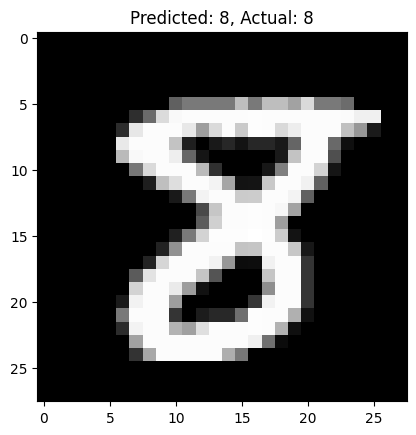

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test, X_train_raw, X_test_raw = train_test_split(X, y, X, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optionally reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Show a sample prediction
index = 0  # Index of the image to display

# Use the raw data for visualization
plt.imshow(X_test_raw.iloc[index].values.reshape(28, 28), cmap=plt.cm.gray)
plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test.iloc[index]}")
plt.show()
